In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.3.0


In [4]:
fashion_mnist=keras.datasets.fashion_mnist

In [6]:
(train_X,train_y),(test_X,test_y)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 46s 10us/step


In [9]:
class_names=['T-shirt/top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [8]:
train_X.shape

(60000, 28, 28)

In [10]:
train_y

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_X.shape

(10000, 28, 28)

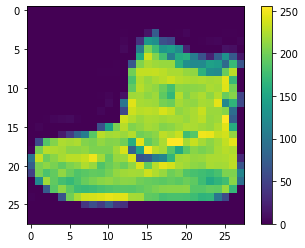

In [21]:
plt.figure()
plt.imshow(train_X[0])
plt.colorbar()
plt.grid(False)
plt.show()

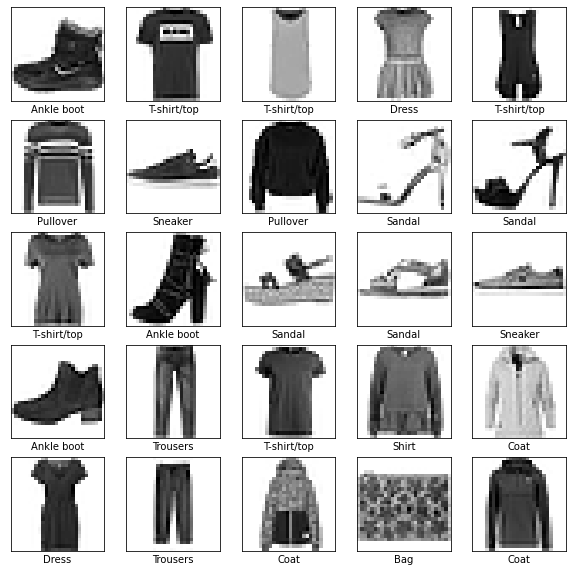

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i]])
plt.show()    

In [30]:
model =keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [31]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [32]:
model.fit(train_X,train_y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 3.3151 - accuracy: 0.6842
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6998 - accuracy: 0.7291
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5926 - accuracy: 0.7782
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5319 - accuracy: 0.8109
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5175 - accuracy: 0.8184
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4941 - accuracy: 0.8287
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4873 - accuracy: 0.8320
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4843 - accuracy: 0.8316
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4765 - accuracy: 0.8350
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.475

In [34]:
test_loss,test_acc = model.evaluate(test_X,test_y)

print('Test Accuracy',test_acc)

313/313 [==============================] - 0s 979us/step - loss: 0.5488 - accuracy: 0.8283
Test Accuracy 0.8282999992370605


In [66]:
predictions = model.predict(test_X)

In [67]:
predictions[0]

array([8.3662992e-20, 1.0495224e-24, 0.0000000e+00, 2.4192712e-27,
       0.0000000e+00, 1.4709677e-02, 0.0000000e+00, 9.7661419e-03,
       6.4671882e-22, 9.7552425e-01], dtype=float32)

In [68]:
np.argmax([predictions[0]])

9

In [69]:
test_y[0]

9

In [78]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array, true_label, img = predictions_array[i], true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label=np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color  = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)  


    
def plot_value_array(i,predictions_array,true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
    
    

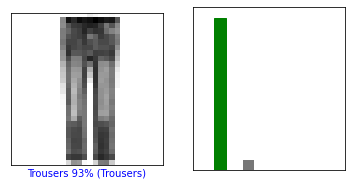

In [83]:
i=15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_y,test_X)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_y)
plt.show()

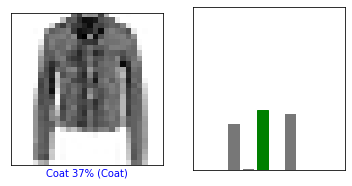

In [80]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_y,test_X)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_y)
plt.show()

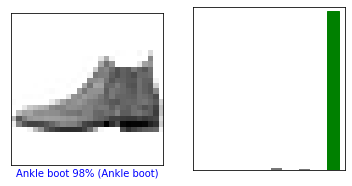

In [81]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_y,test_X)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_y)
plt.show()

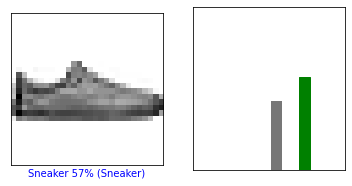

In [82]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_y,test_X)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_y)
plt.show()

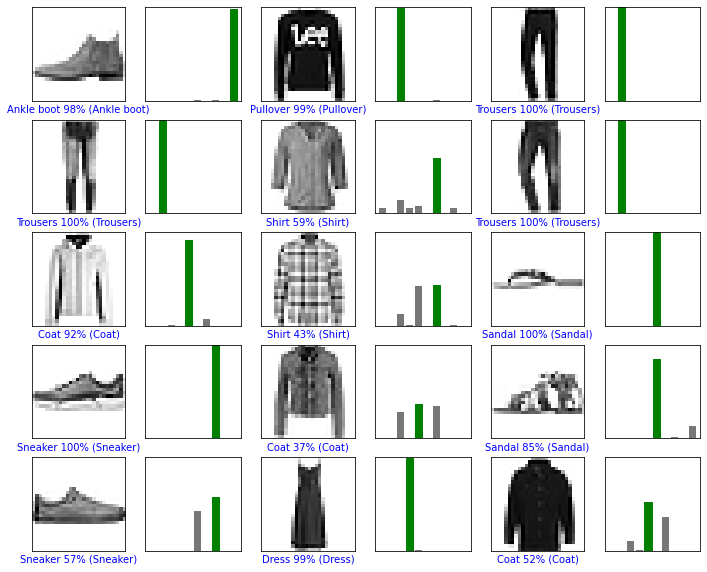

In [89]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols, 2*i+1)
    plot_image(i, predictions, test_y, test_X)
    plt.subplot(num_rows,2*num_cols, 2*i+2)
    plot_value_array(i, predictions,test_y)
plt.show()        

In [90]:
img = test_X[0]

print(img.shape)

(28, 28)


In [93]:
img= (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [94]:
predections_single = model.predict(img)

print(predections_single)

[[8.3662992e-20 1.0495224e-24 0.0000000e+00 2.4192712e-27 0.0000000e+00
  1.4709677e-02 0.0000000e+00 9.7661419e-03 6.4671882e-22 9.7552425e-01]]


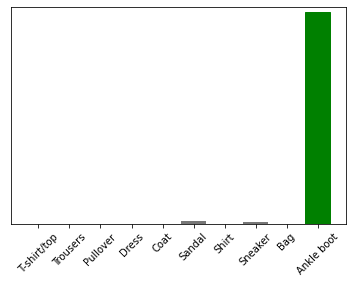

In [96]:
plot_value_array(0,predections_single, test_y)
_ = plt.xticks(range(10),class_names,rotation=45)